In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean, median, stdev

# References

https://www.kaggle.com/datasets/gregorut/videogamesales  
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales#Description  
https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization#1.-What-genre-games-have-been-made-the-most?  

## Does the most popular genre depend on the geographical region? 


# Loading dataset

In [46]:
df = pd.read_csv('data/vgsales.csv')
df.drop_duplicates()
df = df.drop(["Rank"], axis=1)
df = df.drop(["Name"], axis=1)
df = df.drop(["Other_Sales"], axis=1)
print(len(df))

16598


In [47]:
df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,31.37


# Value Count for each attributes

In [48]:
for column in df.columns:
    if df[column].dtypes == "object":
        print(f"*** {column} Count ***")
        print(df[column].value_counts())
    else:
        print(f"*** {column} Mean : {mean(df[column])} ***")
    print()

*** Platform Count ***
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

*** Year Mean : nan ***

*** Genre Count ***
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

*** Publisher Count ***
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
           

# Visualization of year

In [49]:
print(len(df))
print(len(df[df.Year > 1999]))
print(len(df[df.Year > 2009]))
print(len(df[df.Year > 2009].dropna()))

16598
14353
5145
5134


In [50]:
df = df[df.Year > 1999].dropna()

# Discretisation de Platform et Publisher

In [51]:
publishers = ["Electronic Arts", "Activision", "Ubisoft", "Namco Bandai Games", "Konami Digital Entertainment", "THQ", "Sony Computer Entertainment", "Nintendo", "Sega"]

df[df.Publisher.isin(publishers)== False]["Publisher"].value_counts()

Take-Two Interactive    399
Capcom                  326
Tecmo Koei              312
Atari                   297
Square Enix             231
                       ... 
Piacci                    1
iWin                      1
Black Label Games         1
Giga                      1
Paon Corporation          1
Name: Publisher, Length: 448, dtype: int64

In [52]:
df_filt = df["Publisher"].isin(publishers)
df = df[df_filt]

In [53]:
_games_map = {
    "PS": "Playstation",
    "PS2": "Playstation",
    "PS3": "Playstation",
    "PS4": "Playstation",
    "PSP": "PSP",
    "PSV": "PSP",
    "DS": "DS",
    "3DS": "DS",
    "GBA": "DS",
    "N64": "DS",
    "WiiU": "DS",
    "X360": "XBox",
    "XOne": "XBox",
    "XB": "XBox",
    "Wii": "Wii",
    "GC": "Wii",
    "PC" : "PC",
}

df = df.rename(mapper=_games_map)

In [54]:
platforms = ["Playstation", "PSP", "DS", "XBox", "Wii", "PC"]
df_filt = df["Platform"].isin(platforms)
df = df[df_filt]

# Saving the cleaned dataset

In [55]:
df.to_csv('video_games_clean_data.csv')

In [56]:
print(len(df))
df.head(20)

2456


,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,82.74
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,33.00
6,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,30.01
7,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,29.02
8,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,28.62
10,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,24.76
11,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,23.42
13,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,22.72
14,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,22.00


# Analysis Numerical attributes

Give a screenshot of the mean, median, standard deviation, min, max for numerical data, mode/most occurring element for categorical attributes. 

In [57]:
numericals = ["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]

print(f"Year:")
print(f"\t Mean              : {df['Year'].mean()}")
print(f"\t Median            : {df['Year'].median()}")
print(f"\t Standard Deviation: {df['Year'].std()}")
print(f"\t Min               : {df['Year'].min()}")
print(f"\t Max               : {df['Year'].max()}")

for numerical in numericals:
    print(f"{numerical}:")
    print(f"\t Mean              : {'{0:.2g}'.format(df[numerical].mean())}")
    print(f"\t Median            : {'{0:.2g}'.format(df[numerical].median())}")
    print(f"\t Standard Deviation: {'{0:.2g}'.format(df[numerical].std())}")
    print(f"\t Min               : {'{0:.2g}'.format(df[numerical].min())}")
    print(f"\t Max               : {'{0:.2g}'.format(df[numerical].max())}")

Year:
	 Mean              : 2008.442996742671
	 Median            : 2008.0
	 Standard Deviation: 2.329831295866544
	 Min               : 2000.0
	 Max               : 2020.0
NA_Sales:
	 Mean              : 0.3
	 Median            : 0.09
	 Standard Deviation: 1.2
	 Min               : 0
	 Max               : 41
EU_Sales:
	 Mean              : 0.2
	 Median            : 0.01
	 Standard Deviation: 0.94
	 Min               : 0
	 Max               : 29
JP_Sales:
	 Mean              : 0.094
	 Median            : 0
	 Standard Deviation: 0.42
	 Min               : 0
	 Max               : 6.5
Global_Sales:
	 Mean              : 0.65
	 Median            : 0.19
	 Standard Deviation: 2.7
	 Min               : 0.01
	 Max               : 83


In [58]:
categoricals = ["Genre", "Platform", "Publisher"]
for categorical in categoricals:
    print(categorical)
    print(f"Length: {len(df[categorical].value_counts())}")
    print(100*df[categorical].value_counts()/len(df))
    print()


Genre
Length: 12
Action          17.589577
Misc            14.820847
Sports          14.006515
Simulation      10.871336
Role-Playing     7.736156
Adventure        6.555375
Strategy         5.903909
Racing           5.659609
Shooter          5.456026
Platform         4.356678
Puzzle           3.786645
Fighting         3.257329
Name: Genre, dtype: float64

Platform
Length: 4
DS     38.355049
Wii    25.285016
PSP    21.946254
PC     14.413681
Name: Platform, dtype: float64

Publisher
Length: 9
Ubisoft                         16.693811
Electronic Arts                 15.594463
Namco Bandai Games              13.151466
Activision                      12.337134
Konami Digital Entertainment    10.382736
THQ                             10.097720
Nintendo                         9.364821
Sega                             7.614007
Sony Computer Entertainment      4.763844
Name: Publisher, dtype: float64



# Visualize the distribution of each attribute

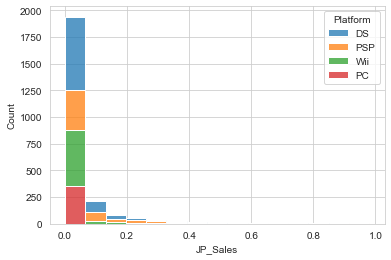

In [59]:
sns.set_style('whitegrid')
palette ={"DS": "C0", "PSP": "C1", "Wii": "C2", "PC": "C3"}
hue_order = ["DS", "PSP", "Wii", "PC"]

numerical = "JP_Sales"
plot = sns.histplot(df[df.JP_Sales < 1],
                    x=numerical,
                    kde = False,
                    bins = 15,
                    hue="Platform",
                    multiple="stack",
                    palette=palette,
                    hue_order=hue_order)

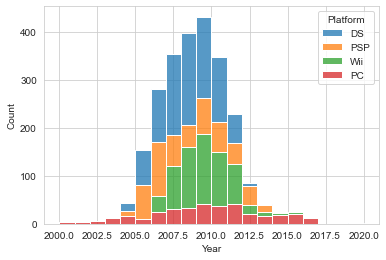

In [60]:
numerical = "Year"
plot = sns.histplot(df,
                    x=numerical,
                    kde = False,
                    bins = 20,
                    hue="Platform",
                    multiple="stack",
                    palette=palette,
                    hue_order=hue_order)

In [61]:
fig = plot.get_figure()
#fig.savefig(f"Histograms/Strat_Platform_{numerical}.png") 

# Pivot

In [62]:
group = df.groupby(["Genre", "Platform"], as_index=False)
agg = group.agg({"EU_Sales": "sum", "JP_Sales": "sum", "NA_Sales": "sum", "Global_Sales": "sum"})

In [63]:
agg.pivot(index='Genre', columns='Platform', values=['EU_Sales', 'NA_Sales', 'JP_Sales', 'Global_Sales']).fillna(0)

EU_Sales                      NA_Sales                        \
Platform           DS     PC    PSP    Wii       DS     PC    PSP     Wii   
Genre                                                                       
Action          13.84   7.59   6.95  14.92    33.10   2.99  11.22   30.57   
Adventure        4.37   1.02   0.90   2.99    10.61   0.03   1.14    6.26   
Fighting         0.25   0.00   3.65   4.01     1.83   0.00   5.73   10.48   
Misc            28.70   1.52   1.19  52.69    33.83   2.05   2.41   88.95   
Platform        17.75   0.25   4.89  22.73    31.91   0.05   7.06   43.22   
Puzzle          18.16   0.01   0.90   3.12    15.90   0.00   1.35    4.91   
Racing           9.46   1.59   9.17  17.45    17.65   0.30  11.31   26.96   
Role-Playing    16.49  15.77   0.89   1.40    34.37  10.85   2.79    3.40   
Shooter          0.49  12.96   4.58   5.85     4.35   5.31   7.65   14.78   
Simulation      30.95  20.51   1.96   5.87    49.98  15.30   1.49   16.32   
Sports           7.67   5.57  11.46  85.28    11.53   0.11  14.75  121.11   
Strategy         1.40  11.92   2.19   0.62     4.00   6.31   1.69    1.54   

             JP_Sales                   Global_Sales                        
Platform           DS   PC   PSP    Wii           DS     PC    PSP     Wii  
Genre                                                                       
Action           9.60  0.0  5.82   3.04        61.33  12.39  28.44   53.14  
Adventure        2.90  0.0  1.98   1.08        19.28   1.17   4.55   11.24  
Fighting         2.86  0.0  3.42   2.93         5.09   0.00  15.12   18.96  
Misc            31.19  0.0  4.25  12.57       100.92   3.80   8.65  169.46  
Platform        13.49  0.0  0.51  11.12        69.08   0.37  15.44   83.63  
Puzzle          15.31  0.0  0.49   1.49        53.41   0.01   3.26   10.42  
Racing           4.51  0.0  0.94   4.05        34.42   2.23  26.93   53.39  
Role-Playing    38.07  0.0  7.46   2.62        94.18  29.77  11.86    7.90  
Shooter          0.23  0.0  0.41   0.62         5.48  20.79  15.68   23.41  
Simulation      11.44  0.0  0.63   1.79       101.63  39.31   5.23   26.31  
Sports           4.89  0.0  5.84  17.63        26.34   6.94  37.64  247.39  
Strategy         2.13  0.0  3.36   1.40         8.07  20.52   8.35    3.75

# Plot

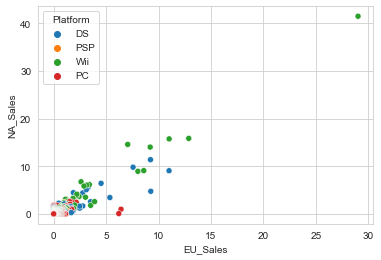

In [64]:
plot = sns.scatterplot(data=df,
                x="EU_Sales",
                y="NA_Sales",
                hue="Platform",
                palette=palette,
                hue_order=hue_order)
fig = plot.get_figure()
#fig.savefig(f"BoxPlot/NA_VS_EU.png") 

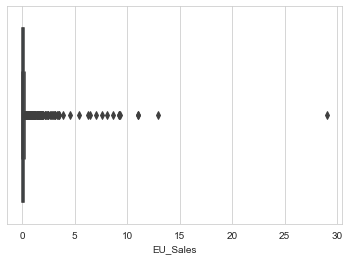

In [65]:
column = "EU_Sales"
plot = sns.boxplot(x=df[column])
fig = plot.get_figure()
#fig.savefig(f"BoxPlot/{column}.png") 

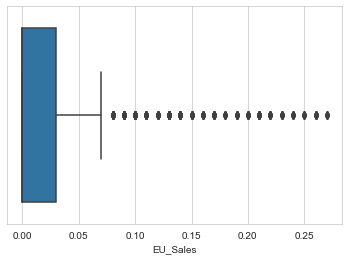

In [66]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

df_filt = df
df_filt["lol"] = remove_outliers(df[column])
plot = sns.boxplot(x=df_filt[df_filt.lol][column])
fig = plot.get_figure()
#fig.savefig(f"BoxPlot/Clean_{column}.png") 

# Matrix

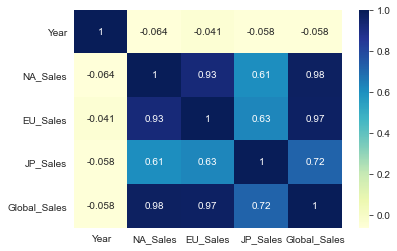

In [67]:
df = df.drop(["lol"], axis=1)
plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
fig = plot.get_figure()
#fig.savefig(f"HeatMap.png") 

In [80]:
EU_DF = df[df.EU_Sales < 1]
JP_DF = EU_DF[EU_DF.JP_Sales < 1]
NA_DF = JP_DF[JP_DF.NA_Sales < 1]
GLO_DF = NA_DF[NA_DF.Global_Sales < 1]
len(GLO_DF)

2171

/Users/cameliaguerraoui/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


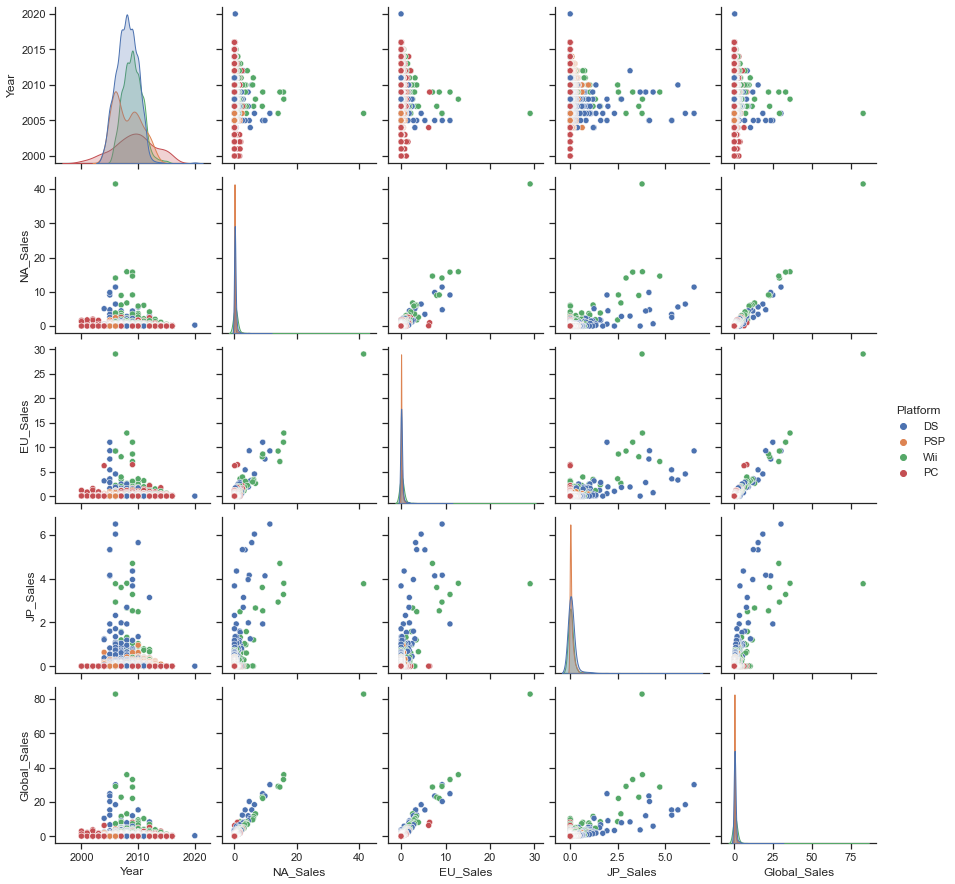

In [81]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="Platform", palette=palette,hue_order=hue_order)

/Users/cameliaguerraoui/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


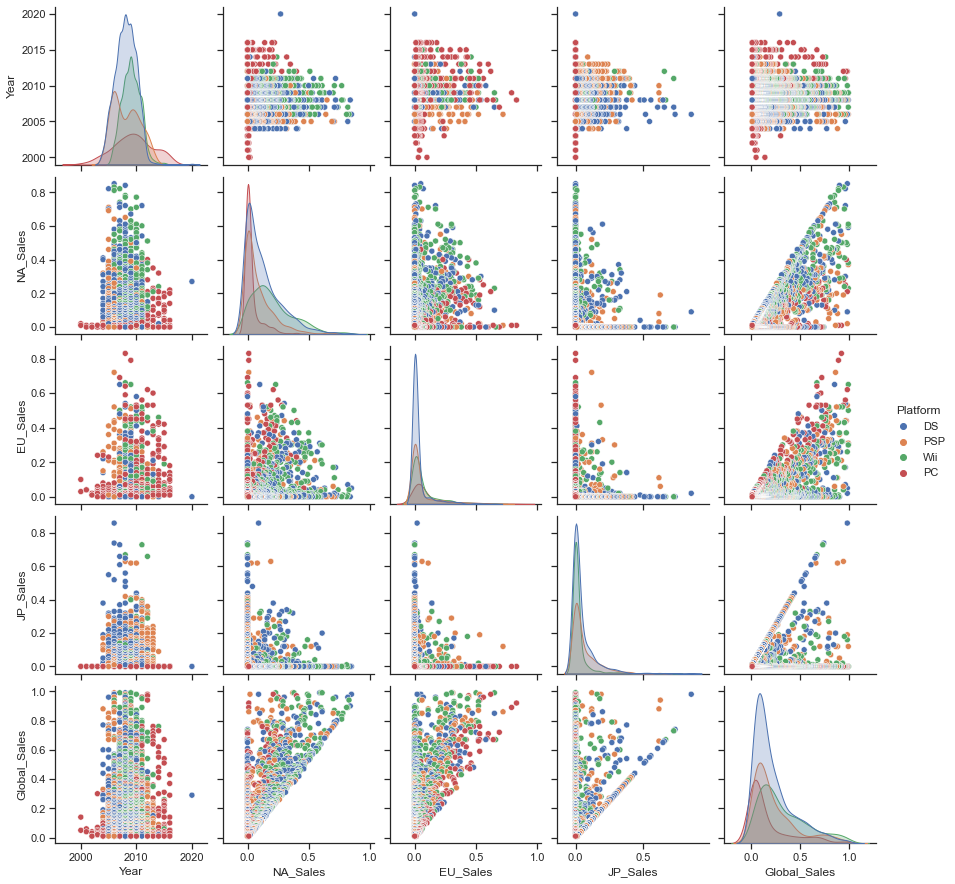

In [82]:
sns.pairplot(GLO_DF, hue="Platform", palette=palette,hue_order=hue_order)

# Parallel

In [119]:
import plotly.express as px

map_color_genre = {
    "Action": 0,
    "Adventure": 1, 
    'Fighting': 2,
    'Misc': 3,
    'Platform': 4,
    'Puzzle': 5,
    'Racing': 6,
    'Role-Playing': 7,
    'Shooter': 8,
    'Simulation':9,
    'Sports': 10,
    'Strategy': 11
}

map_color_platform = {
    "DS": 0,
    "PSP": 1, 
    "Wii": 2,
    "PC": 3,
}

GLO_DF["Color_Genre"] = GLO_DF["Genre"].map(map_color_genre)
df["Color_Genre"] = df["Genre"].map(map_color_genre)

GLO_DF["Color_Platform"] = GLO_DF["Platform"].map(map_color_platform)
df["Color_Platform"] = df["Platform"].map(map_color_platform)

fig = px.parallel_coordinates(df, color="Color_Platform",
                              dimensions=["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"],
                              color_continuous_scale=px.colors.diverging.RdYlGn_r,
)
fig.show()


<ipython-input-119-b0526b27ed05>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-119-b0526b27ed05>:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
fig = px.parallel_coordinates(GLO_DF, color="Color_Platform",
                              dimensions=["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"],
                              color_continuous_scale=px.colors.diverging.RdYlGn_r)
fig.show()